In [314]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import re
from os import path
from glob import glob
from tqdm import tqdm
import numpy as np
from matplotlib import cm


In [315]:
ROOT_PATH = '\\\\CILab_NAS_Data/homes/inchang/PuzzlePCG/ProxyPlayer'

In [316]:
files = glob(path.join(ROOT_PATH, '*', 'MatchResult_*.csv'))
files

['\\\\CILab_NAS_Data/homes/inchang/PuzzlePCG/ProxyPlayer\\method_mcts_player_0_objective_score_simulation_100\\MatchResult_method_mcts_player_0_objective_score_simulation_100_5ee0e6f8-3ec1-4e40-938f-c4d002583b1d.csv',
 '\\\\CILab_NAS_Data/homes/inchang/PuzzlePCG/ProxyPlayer\\method_mcts_player_0_objective_score_simulation_200\\MatchResult_method_mcts_player_0_objective_score_simulation_200_e8591021-89c0-491e-8277-11398ce9a25b.csv',
 '\\\\CILab_NAS_Data/homes/inchang/PuzzlePCG/ProxyPlayer\\method_mcts_player_0_objective_score_simulation_400\\MatchResult_method_mcts_player_0_objective_score_simulation_400_03712e26-74d4-4747-b012-d7df4492a538.csv',
 '\\\\CILab_NAS_Data/homes/inchang/PuzzlePCG/ProxyPlayer\\method_mcts_player_0_objective_score_simulation_800\\MatchResult_method_mcts_player_0_objective_score_simulation_800_e6b83c3a-87bb-4e5d-a3bf-9b840fb296df.csv',
 '\\\\CILab_NAS_Data/homes/inchang/PuzzlePCG/ProxyPlayer\\method_mcts_player_0_simpleEffect_1_objective_score_simulation_100\\Ma

In [317]:
StatisticsColumns = ['Matched_HorizontalPiece', 'Matched_VerticalPiece', 'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece', 'Matched_RainbowPiece']

In [318]:
def parse_filename(data):
    result = dict()
    for i in range(0, len(data), 2):
        result[data[i]] = data[i+1]
    return result

In [319]:
dfs = []
for file_path in tqdm(files):
    # print(file_path)
    file_name = path.basename(file_path)

    _file_name = file_name.split('_')[1:-1]
    args = parse_filename(_file_name)

    df = pd.read_csv(file_path)

    for key, value in args.items():
        df[key] = value
    dfs.append(df)

original_df = pd.concat(dfs)

original_df['Sum_Matched'] = original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece']  + \
    original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece']
original_df.loc[original_df['method'] == 'random', 'simulation'] = 0

original_df['simpleEffect'] = original_df['simpleEffect'].replace(np.nan, 0)
original_df


100%|██████████| 10/10 [00:00<00:00, 75.17it/s]


,EpisodeCount,StepCount,Time,InstanceUUID,SettleCount,ChangedCount,MeanComparisonCount,StdComparisonCount,Matched_HorizontalPiece,Matched_VerticalPiece,...,Target_CrossPiece,Target_RocketPiece,Target_BombPiece,Target_RainbowPiece,method,player,objective,simulation,simpleEffect,Sum_Matched
0,1,300,2023-05-15 06:24:15.159,5ee0e6f8-3ec1-4e40-938f-c4d002583b1d,0,81,5.713333,11.69646,48,50,...,0,2,2,3,mcts,0,score,100,0,288
1,2,301,2023-05-15 06:24:47.997,5ee0e6f8-3ec1-4e40-938f-c4d002583b1d,0,93,6.883721,14.64023,69,27,...,0,2,2,3,mcts,0,score,100,0,414
2,3,300,2023-05-15 06:25:16.790,5ee0e6f8-3ec1-4e40-938f-c4d002583b1d,0,84,5.750000,12.17930,60,31,...,0,2,2,3,mcts,0,score,100,0,360
3,4,301,2023-05-15 06:25:46.574,5ee0e6f8-3ec1-4e40-938f-c4d002583b1d,0,84,5.890366,11.93669,52,30,...,0,2,2,3,mcts,0,score,100,0,312
4,5,300,2023-05-15 06:26:18.098,5ee0e6f8-3ec1-4e40-938f-c4d002583b1d,0,95,6.923333,13.54557,48,37,...,0,2,2,3,mcts,0,score,100,0,288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,503,300,2023-05-15 08:07:38.529,cfa9bc51-725b-4737-803b-7cbb82d81677,0,0,0.000000,0.00000,30,28,...,0,2,2,3,random,0,NaN,0,1,180
503,504,300,2023-05-15 08:07:51.674,cfa9bc51-725b-4737-803b-7cbb82d81677,0,0,0.000000,0.00000,53,31,...,0,2,2,3,random,0,NaN,0,1,318
504,505,300,2023-05-15 08:08:04.621,cfa9bc51-725b-4737-803b-7cbb82d81677,0,0,0.000000,0.00000,49,42,...,0,2,2,3,random,0,NaN,0,1,294
505,506,300,2023-05-15 08:08:17.617,cfa9bc51-725b-4737-803b-7cbb82d81677,0,0,0.000000,0.00000,41,22,...,0,2,2,3,random,0,NaN,0,1,246


In [320]:
match_result = original_df.groupby(['method', 'simpleEffect', 'simulation'])['Matched_HorizontalPiece',
                                      'Matched_VerticalPiece',
                                      'Matched_CrossPiece',
                                      'Matched_RocketPiece',
                                      'Matched_BombPiece',
                                      'Matched_RainbowPiece',
                                      'Sum_Matched'].agg(
    {
        'Matched_HorizontalPiece':['mean','std', 'count'],
        'Matched_VerticalPiece':['mean','std'],
        'Matched_CrossPiece':['mean','std'],
        'Matched_RocketPiece':['mean','std'],
        'Matched_BombPiece':['mean','std'],
        'Matched_RainbowPiece':['mean','std'],
        'Sum_Matched':['mean','std'],
     }
)
match_result

C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Matched_HorizontalPiece                   \
                                                  mean        std count   
method simpleEffect simulation                                            
mcts   0            100                      53.982036  11.907034   334   
                    200                      53.830579  12.393623   242   
                    400                      54.248276  11.870558   145   
                    800                      54.537037  10.936718    54   
       1            100                      53.579755  12.900975   326   
                    200                      52.275701  12.669273   214   
                    400                      53.574803  13.000928   127   
                    800                      53.621212  13.646938    66   
random 0            0                        46.213178  10.019646   516   
       1            0                        45.808679   9.987190   507   

                               Matched_VerticalPiece            \
                                                mean       std   
method simpleEffect simulation                                   
mcts   0            100                    36.790419  9.120700   
                    200                    36.161157  9.109913   
                    400                    36.958621  8.781986   
                    800                    37.425926  9.653627   
       1            100                    34.616564  9.176068   
                    200                    34.098131  9.772756   
                    400                    35.732283  9.888625   
                    800                    34.500000  9.199080   
random 0            0                      33.269380  7.861119   
       1            0                      31.761341  7.677044   

                               Matched_CrossPiece            \
                                             mean       std   
method simpleEffect simulation                                
mcts   0            100                  7.296407  4.685822   
                    200                  7.516529  4.799911   
                    400                  7.020690  4.142377   
                    800                  8.592593  4.862325   
       1            100                  7.092025  4.750138   
                    200                  6.602804  4.021794   
                    400                  7.188976  4.657699   
                    800                  7.151515  4.578352   
random 0            0                    6.193798  4.032542   
       1            0                    6.090730  4.082118   

                               Matched_RocketPiece             \
                                              mean        std   
method simpleEffect simulation                                  
mcts   0            100                  94.173653  17.656884   
                    200                  93.462810  17.831178   
                    400                  94.048276  21.474575   
                    800                  95.962963  22.556397   
       1            100                  90.420245  19.874485   
                    200                  89.341121  18.345676   
                    400                  93.433071  17.643107   
                    800                  92.181818  19.910499   
random 0            0                    83.784884  16.069577   
       1            0                    83.370809  17.007223   

                               Matched_BombPiece            \
                                            mean       std   
method simpleEffect simulation                               
mcts   0            100                 7.796407  4.601265   
                    200                 7.388430  4.581891   
                    400                 7.372414  4.149874   
                    800                 7.370370  3.886582   
       1            100                 7.202454  4.529778   
                    200           

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'b0'),
  Text(1, 0, 'b1'),
  Text(2, 0, 'b2'),
  Text(3, 0, 'b3'),
  Text(4, 0, 'b4'),
  Text(5, 0, 'b5')])

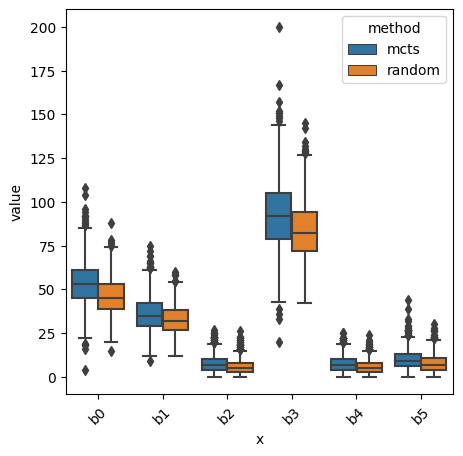

In [331]:
melted_df = original_df.copy()
melted_df = melted_df[melted_df['simulation'] == 1]

plt.figure(figsize=(5, 5))
melted_df = pd.melt(original_df, id_vars=['EpisodeCount', 'method', 'simulation', 'simpleEffect'], value_vars=[*StatisticsColumns], ignore_index=False)
# melted_df['x'] = 'sf' + melted_df['simpleEffect'].astype(str) + '_' + melted_df['variable']
melted_df['x'] = melted_df['variable']
melted_df['x'] = melted_df['x'].str.replace('Matched_HorizontalPiece', 'b0')
melted_df['x'] = melted_df['x'].str.replace('Matched_VerticalPiece', 'b1')
melted_df['x'] = melted_df['x'].str.replace('Matched_CrossPiece', 'b2')
melted_df['x'] = melted_df['x'].str.replace('Matched_RocketPiece', 'b3')
melted_df['x'] = melted_df['x'].str.replace('Matched_BombPiece', 'b4')
melted_df['x'] = melted_df['x'].str.replace('Matched_RainbowPiece', 'b5')
melted_df

ax = sns.boxplot(x="x", y="value", hue="method", data=melted_df)
plt.xticks(rotation=45)